In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [2]:
base_path = "../results/train"
data_size = "small_data"         # or "full_data"
config_name = "hyperparameter_testing"      # or another subfolder name


In [3]:
import yaml

config_path = os.path.join("../configs", f"{config_name}.yaml")

with open(config_path, "r") as f:
    config = yaml.safe_load(f)

gamma_list = config["beta_array"]
cvar_list = config["CVaR_array"]
print(f"Gamma values: {gamma_list}")
print(f"CVaR values: {cvar_list}")


Gamma values: [0.0, 0.1, 0.5, 1.0, 5.0, 10.0, 20.0]
CVaR values: [0.0, 0.5, 1.0, 2.0, 5.0, 10.0]


In [4]:

import os
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_cvar_lines_over_gamma(base_path, data_size, config_name, model_name, gamma_list, cvar_list):
    model_path = os.path.join(base_path, model_name, data_size, config_name)
    val_file = os.path.join(model_path, "validation_results.json")

    if not os.path.isfile(val_file):
        print(f"❌ Missing file for {model_name}")
        return

    try:
        with open(val_file, "r") as f:
            model_data = json.load(f)

        df = pd.DataFrame(model_data)
        df["CVaR"] = df["CVaR"].astype(float)
        df["hyperparameter"] = df["hyperparameter"].astype(int)  # positions (indices)


        #substitute the value in the table with the corresponding value in the gamma_list
        df["hyperparameter"] = df["hyperparameter"].apply(lambda x: gamma_list[x])
        # same for CVaR values
        df["CVaR"] = df["CVaR"].apply(lambda x: cvar_list[x])

        print(df)

        # Group and average
        grouped = df.groupby(["CVaR", "hyperparameter"])["objective_value"].sum().reset_index()/2

        print(grouped)

        # Begin plot
        fig, ax = plt.subplots(figsize=(8, 5))

        for cvar in range(len(cvar_list)):
            subset = grouped[grouped["CVaR"] == cvar]
            # Ensure consistent spacing using index position
            ax.plot(subset["hyperparameter"], subset["objective_value"], label=f"CVaR {cvar_list[cvar]:.0f}")

        # Use index positions (0, 1, 2, ...) but label with real gamma values
        ax.set_xticks(range(len(gamma_list)))
        ax.set_xticklabels([f"{g:.1f}" for g in gamma_list])



        # Format Y-axis labels in thousand Euros
        ax.set_ylabel("Mean Objective Value (Thousand €)")
        ax.tick_params(axis='y')
        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x/1000:.0f}k"))

        ax.set_xlabel("Regularization Level (γ)")


        ax.set_xlabel("Regularization (γ)")
        ax.set_ylabel("Mean Objective Value")
        ax.grid(True)
        ax.legend(title="CVaR Level")
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"⚠️ Error processing {model_name}: {e}")


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_cvar_lines_over_gamma(base_path, data_size, config_name, model_name, gamma_list, cvar_list):
    import os
    import json

    model_path = os.path.join(base_path, model_name, data_size, config_name)
    val_file = os.path.join(model_path, "validation_results.json")

    if not os.path.isfile(val_file):
        print(f"❌ Missing file for {model_name}")
        return

    with open(val_file, "r") as f:
        model_data = json.load(f)

    df = pd.DataFrame(model_data)
    df["CVaR"] = df["CVaR"].astype(float)
    df["hyperparameter"] = df["hyperparameter"].astype(int)

    # Group by CVaR and hyperparameter index
    grouped = df.groupby(["CVaR", "hyperparameter"])["objective_value"].sum().reset_index()
    grouped["objective_value"] /= 2  # Mean over 2 folds

    # Start plot
    fig, ax = plt.subplots(figsize=(10, 6))

    for cvar in sorted(grouped["CVaR"].unique()):
        sub = grouped[grouped["CVaR"] == cvar]
        x_vals = sub["hyperparameter"].values
        y_vals = sub["objective_value"].values
        ax.plot(x_vals, y_vals, label=f"CVaR {cvar:.2f}")

    # X-ticks: real gamma values but even spacing
    ax.set_xticks(range(len(gamma_list)))
    ax.set_xticklabels([f"{g:.2f}" for g in gamma_list], fontsize=15)

    # Labels and formatting
    ax.set_xlabel("Regularization (γ)", fontsize=15)
    ax.set_ylabel("Profit in €", fontsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.tick_params(axis='x', labelsize=15)
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x/1000:.0f}k"))

    ax.grid(True)
    ax.legend(title="CVaR Level", fontsize=18, title_fontsize=15)
    plt.tight_layout()
    plt.show()


# Example usage


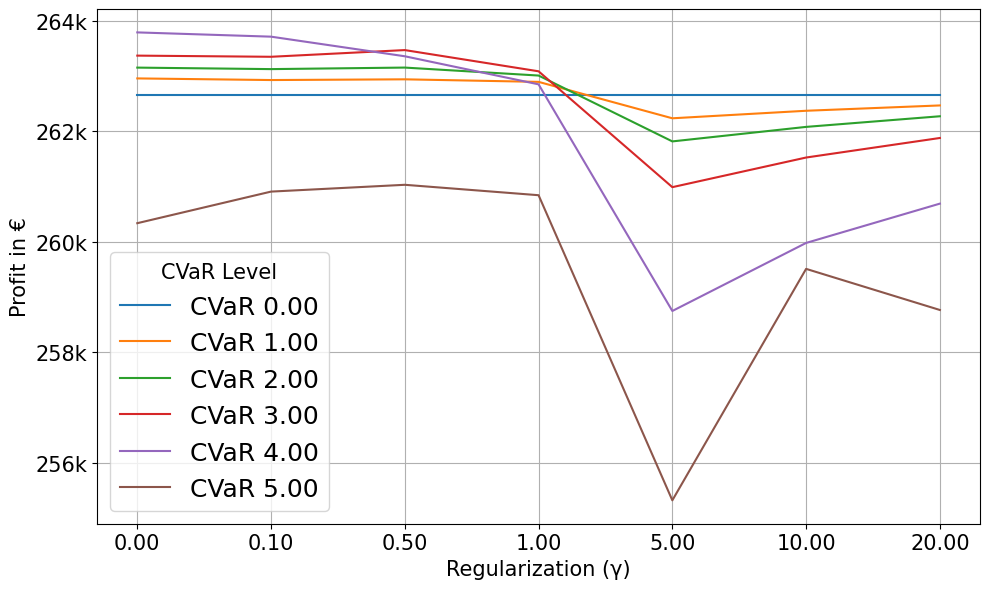

In [6]:
plot_cvar_lines_over_gamma(base_path, data_size, config_name, model_name="linear_PolicyModel", gamma_list=gamma_list, cvar_list=cvar_list)
